In [1]:
# import packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import geopandas as gpd

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

import dask.dataframe as dd
#from dask_ml.datasets import make_regression

from sklearn.model_selection import train_test_split



import math
from scipy import stats
from sklearn.linear_model import LinearRegression


from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline

#import ArcgisLib

# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [3]:
cols = ['FULLVAL', 'BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'STORIES',
       'BLDFRONT', 'BLDDEPTH', 'Borough', 'nearest_grocery',
       'nearest_subway_entrance', 'nearest_basketball_court',
       'nearest_daycare_facility', 'nearest_athletic_facility', 'nearest_park',
       'total_arrests', 'normalized_arrest_cnt', 'tract_tot_pop']

In [4]:
training_data = pd.DataFrame(np.concatenate((y_train.reshape(len(y_train),1),X_train),axis=1))
#training_data.columns=["y"]+["x{}".format(i) for i in range(1,18)]

test_data = pd.DataFrame(np.concatenate((y_test.reshape(len(y_test),1),X_test),axis=1))
#test_data.columns=["y"]+["x{}".format(i) for i in range(1,18)]

In [5]:
training_data.columns = cols
test_data.columns = cols

In [6]:
training_data.head()

,FULLVAL,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,STORIES,BLDFRONT,BLDDEPTH,Borough,nearest_grocery,nearest_subway_entrance,nearest_basketball_court,nearest_daycare_facility,nearest_athletic_facility,nearest_park,total_arrests,normalized_arrest_cnt,tract_tot_pop
0,299188.0,37.0,1.0,44.627777,102.016934,2.0,23.824379,35.693967,4.0,19.736226,6.638024,0.820990,0.481849,0.988151,0.403712,56.0,0.036435,1537.0
1,456000.0,5.0,0.0,20.000000,100.000000,2.0,15.000000,34.000000,3.0,3.592440,1.438046,1.495495,0.243891,0.366221,0.397952,5.0,0.002521,1983.0
2,222000.0,8.0,0.0,31.000000,95.000000,2.0,19.000000,29.000000,4.0,19.857282,6.838195,0.627303,0.293203,0.884143,0.341863,56.0,0.036435,1537.0
3,716000.0,1.0,0.0,40.000000,100.000000,2.0,26.000000,34.000000,3.0,6.119097,4.160749,0.427542,0.799178,0.450989,0.463846,13.0,0.006448,2016.0
4,558000.0,1.0,0.0,50.000000,100.000000,2.0,20.000000,25.000000,3.0,8.591949,1.433162,0.758978,0.447454,0.622004,0.387162,5.0,0.002998,1668.0


In [7]:
# training_data = training_data.drop(['total_arrests'], axis=1)
# training_data.head()

In [8]:
test_data.head()

,FULLVAL,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,STORIES,BLDFRONT,BLDDEPTH,Borough,nearest_grocery,nearest_subway_entrance,nearest_basketball_court,nearest_daycare_facility,nearest_athletic_facility,nearest_park,total_arrests,normalized_arrest_cnt,tract_tot_pop
0,539000.0,1.0,0.0,37.000000,80.0000,2.5,24.00000,34.000000,0.0,4.495232,1.796132,2.299525,0.162156,0.450106,0.420891,5.0,0.002121,2357.0
1,175984.0,38.0,4.0,34.296824,49.4079,16.0,28.25025,40.170609,2.0,2.719812,0.248012,0.147321,0.355898,0.137763,0.184309,23.0,0.004520,5089.0
2,359000.0,10.0,0.0,50.000000,99.0000,2.0,22.00000,46.000000,4.0,14.241683,1.277285,0.704351,0.103695,0.695722,0.516546,148.0,0.023132,6398.0
3,143000.0,16.0,5.0,16.000000,75.0000,3.0,17.00000,45.000000,1.0,2.478592,0.476938,0.108817,0.091509,0.110111,0.120409,52.0,0.011550,4502.0
4,771000.0,13.0,0.0,25.000000,95.0000,2.0,20.00000,69.000000,1.0,4.923848,0.163302,0.105833,0.913401,0.099126,0.114560,10.0,0.002363,4232.0


In [9]:
training_data['Borough'] = training_data['Borough'] + 1
test_data['Borough'] = test_data['Borough'] + 1

In [10]:
training_data.head()

,FULLVAL,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,STORIES,BLDFRONT,BLDDEPTH,Borough,nearest_grocery,nearest_subway_entrance,nearest_basketball_court,nearest_daycare_facility,nearest_athletic_facility,nearest_park,total_arrests,normalized_arrest_cnt,tract_tot_pop
0,299188.0,37.0,1.0,44.627777,102.016934,2.0,23.824379,35.693967,5.0,19.736226,6.638024,0.820990,0.481849,0.988151,0.403712,56.0,0.036435,1537.0
1,456000.0,5.0,0.0,20.000000,100.000000,2.0,15.000000,34.000000,4.0,3.592440,1.438046,1.495495,0.243891,0.366221,0.397952,5.0,0.002521,1983.0
2,222000.0,8.0,0.0,31.000000,95.000000,2.0,19.000000,29.000000,5.0,19.857282,6.838195,0.627303,0.293203,0.884143,0.341863,56.0,0.036435,1537.0
3,716000.0,1.0,0.0,40.000000,100.000000,2.0,26.000000,34.000000,4.0,6.119097,4.160749,0.427542,0.799178,0.450989,0.463846,13.0,0.006448,2016.0
4,558000.0,1.0,0.0,50.000000,100.000000,2.0,20.000000,25.000000,4.0,8.591949,1.433162,0.758978,0.447454,0.622004,0.387162,5.0,0.002998,1668.0


In [ ]:
# #create a formulae for multi-variate regression using list comprehension
# #formula='FULLVAL~+'+'+'.join(['x%d'%p for p in cols(1,18)]); formula

# for i in xrange(0, a):
#     for j in xrange(i, a): # ensures that j >= i, no test required
#         part = buffer(s, i, j+1-i) # don't duplicate data
#         if len(part) > 0:
#             sub_Strings.append(part)

# formula='FULLVAL~ C(BLDGCL) + C(TAXCLASS) + LTFRONT + LTDEPTH + STORIES + BLDFRONT + BLDDEPTH + C(Borough) + nearest_grocery + nearest_subway_entrance + nearest_basketball_court + nearest_daycare_facility + nearest_athletic_facility + nearest_park + normalized_arrest_cnt'

# lm12 = smf.ols(formula=formula, data = training_data).fit()
# print(lm12.summary())

In [15]:
formula='FULLVAL~ BLDGCL + TAXCLASS + LTFRONT + LTDEPTH + STORIES + BLDFRONT + BLDDEPTH + Borough + nearest_grocery + nearest_subway_entrance + nearest_basketball_court + nearest_daycare_facility + nearest_athletic_facility + nearest_park + normalized_arrest_cnt + tract_tot_pop'

lm = smf.ols(formula=formula, data = training_data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                FULLVAL   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                 2.596e+04
Date:                Sat, 14 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:43:01   Log-Likelihood:            -8.7642e+07
No. Observations:             5389800   AIC:                         1.753e+08
Df Residuals:                 5389783   BIC:                         1.753e+08
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [16]:
training_data['predictions'] = lm.predict(training_data)

In [17]:
training_data.head()

,FULLVAL,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,STORIES,BLDFRONT,BLDDEPTH,Borough,nearest_grocery,nearest_subway_entrance,nearest_basketball_court,nearest_daycare_facility,nearest_athletic_facility,nearest_park,total_arrests,normalized_arrest_cnt,tract_tot_pop,predictions
0,299188.0,37.0,1.0,44.627777,102.016934,2.0,23.824379,35.693967,5.0,19.736226,6.638024,0.820990,0.481849,0.988151,0.403712,56.0,0.036435,1537.0,-7564.313127
1,456000.0,5.0,0.0,20.000000,100.000000,2.0,15.000000,34.000000,4.0,3.592440,1.438046,1.495495,0.243891,0.366221,0.397952,5.0,0.002521,1983.0,669930.747034
2,222000.0,8.0,0.0,31.000000,95.000000,2.0,19.000000,29.000000,5.0,19.857282,6.838195,0.627303,0.293203,0.884143,0.341863,56.0,0.036435,1537.0,88557.651515
3,716000.0,1.0,0.0,40.000000,100.000000,2.0,26.000000,34.000000,4.0,6.119097,4.160749,0.427542,0.799178,0.450989,0.463846,13.0,0.006448,2016.0,450867.676854
4,558000.0,1.0,0.0,50.000000,100.000000,2.0,20.000000,25.000000,4.0,8.591949,1.433162,0.758978,0.447454,0.622004,0.387162,5.0,0.002998,1668.0,830576.809018


In [18]:
#calculate R2 value
slope, intercept, r_value, p_value, std_err = stats.linregress(training_data.predictions, training_data.FULLVAL)
r_2 = r_value**2
print('r2: {}'.format(r_2))

r2: 0.07155213852966934


In [19]:
from sklearn.externals import joblib

joblib.dump(lm,'lm.pkl')

C:\Users\aniha\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['lm.pkl']

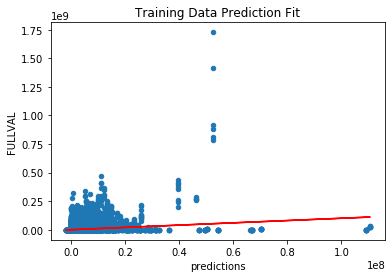

In [20]:
fig, ax = plt.subplots() #get axis to plot on
#ax.set_xscale('log'); ax.set_yscale('log') #set up log-scale for axis
#REStaten_.plot(x='LAND_SQUARE_FEET',y='SALE_PRICE',kind='scatter', logx=True, logy=True)
training_data.plot(ax=ax,kind='scatter',x='predictions',y='FULLVAL', title = 'Training Data Prediction Fit') #show the data
ax.plot(training_data.predictions,training_data.predictions,'r-'); #show the regression line
plt.show()

In [21]:
test_data['predictions'] = lm.predict(test_data)
test_data.head()

#calculate R2 value
slope, intercept, r_value, p_value, std_err = stats.linregress(test_data.predictions, test_data.FULLVAL)
r_squared = r_value**2
print('r2: {}'.format(r_squared))

r2: 0.07526691676683368


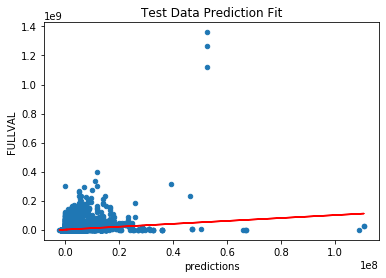

In [22]:
fig, ax = plt.subplots() #get axis to plot on
#ax.set_xscale('log'); ax.set_yscale('log') #set up log-scale for axis
#REStaten_.plot(x='LAND_SQUARE_FEET',y='SALE_PRICE',kind='scatter', logx=True, logy=True)
test_data.plot(ax=ax,kind='scatter',x='predictions',y='FULLVAL', title = 'Test Data Prediction Fit') #show the data
ax.plot(test_data.predictions,test_data.predictions,'r-'); #show the regression line
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(training_data.corr())
plt.show()

corr = training_data.corr()
print(corr)

In [ ]:
edited_dataset = training_data[['FULLVAL', 'nearest_subway_entrance', 'nearest_park', 'normalized_arrest_cnt']].copy()

In [ ]:
lm3 = smf.ols(formula='FULLVAL~nearest_subway_entrance+nearest_park+normalized_arrest_cnt', data = edited_dataset).fit()
print(lm3.summary())

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(edited_dataset.corr())
plt.show()

edited_corr = edited_dataset.corr()
print(edited_corr)

In [ ]:
edited_dataset['prediction'] = lm3.predict()
edited_dataset.head()

In [ ]:
fig, ax = plt.subplots() #get axis to plot on
ax.set_xscale('log'); ax.set_yscale('log') #set up log-scale for axis
edited_dataset.plot(ax=ax,kind='scatter',x='prediction',y='FULLVAL') #show the data
ax.plot(edited_dataset.prediction,edited_dataset.prediction,'r-'); #show the regression line